In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [4]:
#1. Cargar los datos
df = pd.read_csv("./../data/final/fbref_tm_laliga_longitudinal.csv")
display(df.head())

,Player,position,Age,Nation,club,mv_millions,Season,player_url,MP,Playing Time_Starts,...,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value
0,Aleix Vidal,Right Winger,27.0,ESP,FC Barcelona,7.5,2017/2018,https://www.transfermarkt.com/aleix-vidal/prof...,15.0,4,...,9.0,4.0,0.0,0.0,0.0,24.0,3.0,5.0,37.5,€7.50m
1,André Gomes,Central Midfield,24.0,POR,FC Barcelona,15.0,2017/2018,https://www.transfermarkt.com/andre-gomes/prof...,16.0,6,...,4.0,12.0,0.0,0.0,0.0,39.0,12.0,7.0,63.2,€15.00m
2,Andrés Iniesta,Central Midfield,33.0,ESP,FC Barcelona,10.0,2017/2018,https://www.transfermarkt.com/andres-iniesta/p...,30.0,25,...,10.0,22.0,0.0,0.0,0.0,123.0,2.0,7.0,22.2,€10.00m
3,Arda Turan,Left Winger,30.0,TUR,FC Barcelona,4.0,2017/2018,https://www.transfermarkt.com/arda-turan/profi...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€4.00m
4,Carles Aleñá,Central Midfield,19.0,ESP,FC Barcelona,10.0,2017/2018,https://www.transfermarkt.com/carles-alena/pro...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€10.00m


#### Tamaño del dataset

In [5]:

print(f"✅ Dataset cargado con {df.shape[0]:,} filas y {df.shape[1]} columnas")

✅ Dataset cargado con 4,966 filas y 205 columnas


Dataset con ***4,966 filas***, y ***205 columnas***

Analizaremos más adelante si podemos reducir la dimensionalidad de este datset 

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Columns: 205 entries, Player to market_value
dtypes: float64(194), int64(4), object(7)
memory usage: 7.8+ MB


En los tipos de las columnas encontramos,
- **194 float**
- **4 int**
- **7 object**

### Analisis de las variables tipo Object (categóricas)

In [7]:
# Listar columnas tipo object
df.select_dtypes(include="object").columns.tolist()


['Player',
 'position',
 'Nation',
 'club',
 'Season',
 'player_url',
 'market_value']

#### Position
Se reducen las posiciones, a las 4 esenciales,

In [8]:
df["position"].value_counts()

position
Centre-Back           857
Centre-Forward        700
Central Midfield      634
Goalkeeper            545
Left Winger           412
Right-Back            397
Right Winger          391
Left-Back             374
Defensive Midfield    319
Attacking Midfield    291
Second Striker         31
Right Midfield         12
Left Midfield           3
Name: count, dtype: int64

In [9]:
# Diccionario de mapeo
map_pos10 = {
    'Goalkeeper': 'Goalkeeper',
    'Centre-Back': 'Centre-Back',
    'Left-Back': 'Left-Back',
    'Right-Back': 'Right-Back',

    'Centre-Forward': 'Centre-Forward',
    'Second Striker': 'Centre-Forward',   # rare → delantero

    'Left Winger': 'Left Winger',
    'Right Winger': 'Right Winger',

    'Central Midfield': 'Central Midfield',
    'Defensive Midfield': 'Defensive Midfield',
    'Attacking Midfield': 'Attacking Midfield',
    'Right Midfield': 'Central Midfield', # rare → medio
    'Left Midfield': 'Central Midfield',  # rare → medio
}

# Crear nueva columna con las 10 categorías finales
df['pos10'] = df['position'].map(map_pos10)

# Comprobar
print(df['pos10'].value_counts(dropna=False))


pos10
Centre-Back           857
Centre-Forward        731
Central Midfield      649
Goalkeeper            545
Left Winger           412
Right-Back            397
Right Winger          391
Left-Back             374
Defensive Midfield    319
Attacking Midfield    291
Name: count, dtype: int64


#### Nation

In [10]:
df["Nation"].value_counts()

Nation
ESP    3069
ARG     240
FRA     182
BRA     160
URU     135
       ... 
SYR       1
MAS       1
BUL       1
PUR       1
SLE       1
Name: count, Length: 91, dtype: int64

In [11]:
rare_thresh = 20
counts = df['Nation'].value_counts()
popular = counts[counts >= rare_thresh].index
df['Nation_grp'] = df['Nation'].where(df['Nation'].isin(popular), 'Other')

df["Nation_grp"].value_counts()

Nation_grp
ESP      3069
Other     445
ARG       240
FRA       182
BRA       160
URU       135
POR       106
MAR        87
COL        59
BEL        46
GHA        39
NED        38
DEN        37
TUR        36
NGA        35
MEX        32
SEN        31
SRB        31
CIV        25
GER        23
CHI        23
ITA        23
VEN        22
JPN        21
CMR        21
Name: count, dtype: int64

#### Club

In [12]:
df["club"].value_counts()

club
FC Barcelona              289
Real Sociedad             272
Atlético de Madrid        266
Real Betis Balompié       260
Sevilla FC                259
Celta de Vigo             253
Valencia CF               252
Villarreal CF             251
Real Madrid               237
Athletic Bilbao           236
Getafe CF                 234
Deportivo Alavés          231
RCD Espanyol Barcelona    183
CA Osasuna                170
Real Valladolid CF        160
Girona FC                 154
Levante UD                146
RCD Mallorca              145
Rayo Vallecano            138
Granada CF                132
Cádiz CF                  126
Elche CF                  104
CD Leganés                103
UD Las Palmas              95
SD Eibar                   93
UD Almería                 60
SD Huesca                  50
Málaga CF                  36
Deportivo de La Coruña     31
Name: count, dtype: int64

In [13]:

threshold = 100
counts = df['club'].value_counts()
popular = counts[counts >= threshold].index

df['club_grp'] = df['club'].where(df['club'].isin(popular), 'Other')

# Comprobar
print(df['club_grp'].value_counts())



club_grp
Other                     365
FC Barcelona              289
Real Sociedad             272
Atlético de Madrid        266
Real Betis Balompié       260
Sevilla FC                259
Celta de Vigo             253
Valencia CF               252
Villarreal CF             251
Real Madrid               237
Athletic Bilbao           236
Getafe CF                 234
Deportivo Alavés          231
RCD Espanyol Barcelona    183
CA Osasuna                170
Real Valladolid CF        160
Girona FC                 154
Levante UD                146
RCD Mallorca              145
Rayo Vallecano            138
Granada CF                132
Cádiz CF                  126
Elche CF                  104
CD Leganés                103
Name: count, dtype: int64


#### Season

In [14]:
df["Season"].value_counts()

Season
2021/2022    675
2024/2025    662
2023/2024    648
2022/2023    644
2020/2021    622
2019/2020    587
2017/2018    576
2018/2019    552
Name: count, dtype: int64

In [15]:
season_order = {
    '2017/2018': 0,
    '2018/2019': 1,
    '2019/2020': 2,
    '2020/2021': 3,
    '2021/2022': 4,
    '2022/2023': 5,
    '2023/2024': 6,
    '2024/2025': 7
}
df['season_idx'] = df['Season'].map(season_order)

df['season_idx'].value_counts()

season_idx
4    675
7    662
6    648
5    644
3    622
2    587
0    576
1    552
Name: count, dtype: int64

In [16]:
df.select_dtypes(include="int").columns.tolist()


['Playing Time_Starts',
 'Starts_Starts',
 'Subs_Subs',
 'Subs_unSub',
 'season_idx']

In [17]:
df.select_dtypes(include="float").columns.tolist()


['Age',
 'mv_millions',
 'MP',
 'Playing Time_Min',
 'Playing Time_90s',
 'Performance_Gls',
 'Performance_Ast',
 'Performance_G+A',
 'Performance_G-PK',
 'Performance_PK',
 'Performance_PKatt',
 'Performance_CrdY',
 'Performance_CrdR',
 'Expected_xG',
 'Expected_npxG',
 'Expected_xAG',
 'Expected_npxG+xAG',
 'Progression_PrgC',
 'Progression_PrgP',
 'Progression_PrgR',
 'Per 90 Minutes_Gls',
 'Per 90 Minutes_Ast',
 'Per 90 Minutes_G+A',
 'Per 90 Minutes_G-PK',
 'Per 90 Minutes_G+A-PK',
 'Per 90 Minutes_xG',
 'Per 90 Minutes_xAG',
 'Per 90 Minutes_xG+xAG',
 'Per 90 Minutes_npxG',
 'Per 90 Minutes_npxG+xAG',
 'Playing Time_MP',
 'Performance_GA',
 'Performance_GA90',
 'Performance_SoTA',
 'Performance_Saves',
 'Performance_Save%',
 'Performance_W',
 'Performance_D',
 'Performance_L',
 'Performance_CS',
 'Performance_CS%',
 'Penalty Kicks_PKatt',
 'Penalty Kicks_PKA',
 'Penalty Kicks_PKsv',
 'Penalty Kicks_PKm',
 'Penalty Kicks_Save%',
 '90s',
 'Goals_GA',
 'Goals_PKA',
 'Goals_FK',
 'Go

In [18]:
df.describe() 

,Age,mv_millions,MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,...,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,season_idx
count,4961.000000,4966.000000,4105.000000,4966.000000,4269.000000,4275.000000,4276.000000,4275.000000,4275.000000,4276.000000,...,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4003.000000,4966.000000
mean,25.291070,8.293944,16.745676,12.318365,1286.203326,14.271509,1.694107,1.158129,2.852632,1.522685,...,12.230499,12.616069,0.160928,0.217147,0.045678,64.524947,20.362146,20.279925,48.261379,3.631494
std,4.742092,15.997112,12.660745,11.537510,966.589317,10.745362,3.300962,1.891358,4.591328,2.892895,...,13.876321,12.945272,0.488011,0.518565,0.217602,57.628071,26.549798,23.199809,22.030992,2.273966
min,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,4.000000,1.000000,381.000000,4.200000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,16.000000,3.000000,4.000000,34.900000,2.000000
50%,25.000000,2.500000,16.000000,10.000000,1172.000000,13.000000,0.000000,0.000000,1.000000,0.000000,...,7.000000,9.000000,0.000000,0.000000,0.000000,49.000000,11.000000,14.000000,48.500000,4.000000
75%,29.000000,8.000000,29.000000,22.000000,2082.000000,23.100000,2.000000,2.000000,4.000000,2.000000,...,19.000000,20.000000,0.000000,0.000000,0.000000,101.000000,28.000000,29.000000,60.000000,6.000000
max,41.000000,200.000000,38.000000,38.000000,3420.000000,38.000000,36.000000,21.000000,49.000000,32.000000,...,79.000000,90.000000,6.000000,5.000000,2.000000,320.000000,307.000000,234.000000,100.000000,7.000000


# Analisis de Valores nulos

In [19]:
pd.set_option('display.max_rows', 300)  # o el número que quieras
df.isnull().sum() 


Player                          0
position                        0
Age                             5
Nation                          4
club                            0
mv_millions                     0
Season                          0
player_url                      0
MP                            861
Playing Time_Starts             0
Playing Time_Min              697
Playing Time_90s              691
Performance_Gls               690
Performance_Ast               691
Performance_G+A               691
Performance_G-PK              690
Performance_PK                690
Performance_PKatt             690
Performance_CrdY              691
Performance_CrdR              691
Expected_xG                   696
Expected_npxG                 696
Expected_xAG                  696
Expected_npxG+xAG             696
Progression_PrgC              696
Progression_PrgP              696
Progression_PrgR              696
Per 90 Minutes_Gls            697
Per 90 Minutes_Ast            697
Per 90 Minutes

Podemos encontrar gran cantidad de valores nulos, observamos que muchos tienen al

## Columnas esenciales con pocos nulos

### - AGE

In [20]:
df[df["Age"].isnull()]

,Player,position,Age,Nation,club,mv_millions,Season,player_url,MP,Playing Time_Starts,...,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value,pos10,Nation_grp,club_grp,season_idx
3000,Oscar Medina,Goalkeeper,NaN,NaN,Deportivo Alavés,0.0,2021/2022,https://www.transfermarkt.com/oscar-medina/pro...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,-,Goalkeeper,Other,Deportivo Alavés,4
4010,Max Svensson,Centre-Forward,NaN,ESP,CA Osasuna,0.4,2023/2024,https://www.transfermarkt.com/max-svensson/pro...,NaN,0,...,0.0,0.0,0.0,0.0,NaN,€400k,Centre-Forward,ESP,CA Osasuna,6
4518,Fer López,Right Winger,NaN,NaN,Celta de Vigo,5.0,2024/2025,https://www.transfermarkt.com/fer-lopez/profil...,17.0,7,...,0.0,25.0,2.0,9.0,18.2,€5.00m,Right Winger,Other,Celta de Vigo,7
4711,Diego Ferrer,Goalkeeper,NaN,NaN,Getafe CF,0.0,2024/2025,https://www.transfermarkt.com/diego-ferrer/pro...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,-,Goalkeeper,Other,Getafe CF,7
4909,Israel Mora,Goalkeeper,NaN,NaN,UD Las Palmas,0.0,2024/2025,https://www.transfermarkt.com/israel-mora/prof...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,-,Goalkeeper,Other,Other,7


Como tenemos más temporadas de todos los equipos **intentamos buscar si el jugador parece en otras temporadas para poder imputar su edad**

In [21]:
missing_age_idx = df[df["Age"].isnull()].index
print(f"❗ Filas con edad nula encontradas: {missing_age_idx.tolist()}")
for idx in missing_age_idx:
    player = df.loc[idx, "Player"]
    print (f"🔍 Procesando jugador: {player} (índice {idx})")
    
    # Filas de ese jugador con edad conocida
    player_rows = df[(df["Player"] == player) & (df["Age"].notnull())]
    print(f"  Filas con edad conocida para {player}: {player_rows.shape[0]} filas")

❗ Filas con edad nula encontradas: [3000, 4010, 4518, 4711, 4909]
🔍 Procesando jugador: Oscar Medina (índice 3000)
  Filas con edad conocida para Oscar Medina: 0 filas
🔍 Procesando jugador: Max Svensson (índice 4010)
  Filas con edad conocida para Max Svensson: 0 filas
🔍 Procesando jugador: Fer López (índice 4518)
  Filas con edad conocida para Fer López: 0 filas
🔍 Procesando jugador: Diego Ferrer (índice 4711)
  Filas con edad conocida para Diego Ferrer: 0 filas
🔍 Procesando jugador: Israel Mora (índice 4909)
  Filas con edad conocida para Israel Mora: 0 filas


Estos jugadores **no se encuentran en ninguna otra temporada además al ser pocos casos y tratarse de jugadores que no han tenido mucho protagonismo durante la temporada, que posiblemente sean jugadores de la cantera o jugadores muy jóvenes que no tengan tantas oportunidades en el primer equipo** la decisión tomada para estos valores nulos es eliminarlos.


In [22]:
df = df[df["Age"].notnull()].reset_index(drop=True)
df.isnull().sum() 


Player                          0
position                        0
Age                             0
Nation                          0
club                            0
mv_millions                     0
Season                          0
player_url                      0
MP                            860
Playing Time_Starts             0
Playing Time_Min              694
Playing Time_90s              688
Performance_Gls               687
Performance_Ast               688
Performance_G+A               688
Performance_G-PK              687
Performance_PK                687
Performance_PKatt             687
Performance_CrdY              688
Performance_CrdR              688
Expected_xG                   693
Expected_npxG                 693
Expected_xAG                  693
Expected_npxG+xAG             693
Progression_PrgC              693
Progression_PrgP              693
Progression_PrgR              693
Per 90 Minutes_Gls            694
Per 90 Minutes_Ast            694
Per 90 Minutes

Al volver a revisar los valores nulos podemos ver como los valores nulos de la columna **Nations**, también se han eliminado.

### - Playing Time, Playing Time_Min, Playing Time_90s

In [23]:
df[df["MP"].isnull()].head(40)

,Player,position,Age,Nation,club,mv_millions,Season,player_url,MP,Playing Time_Starts,...,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value,pos10,Nation_grp,club_grp,season_idx
643,Borja Mayoral,Centre-Forward,21.0,ESP,Real Madrid,4.00,2018/2019,https://www.transfermarkt.com/borja-mayoral/pr...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,€4.00m,Centre-Forward,ESP,Real Madrid,1
644,Borja Mayoral,Centre-Forward,21.0,ESP,Levante UD,4.00,2018/2019,https://www.transfermarkt.com/borja-mayoral/pr...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,€4.00m,Centre-Forward,ESP,Levante UD,1
645,Brahim Díaz,Right Winger,18.0,MAR,Real Madrid,17.00,2018/2019,https://www.transfermarkt.com/brahim-diaz/prof...,NaN,5,...,0.0,13.0,0.0,5.0,0.0,€17.00m,Right Winger,MAR,Real Madrid,1
646,Casemiro,Defensive Midfield,26.0,BRA,Real Madrid,60.00,2018/2019,https://www.transfermarkt.com/casemiro/profil/...,NaN,27,...,0.0,184.0,83.0,51.0,61.9,€60.00m,Defensive Midfield,BRA,Real Madrid,1
647,Dani Ceballos,Central Midfield,21.0,ESP,Real Madrid,30.00,2018/2019,https://www.transfermarkt.com/dani-ceballos/pr...,NaN,13,...,0.0,102.0,9.0,18.0,33.3,€30.00m,Central Midfield,ESP,Real Madrid,1
648,Federico Valverde,Central Midfield,20.0,URU,Real Madrid,20.00,2018/2019,https://www.transfermarkt.com/federico-valverd...,NaN,6,...,0.0,52.0,9.0,6.0,60.0,€20.00m,Central Midfield,URU,Real Madrid,1
649,Gareth Bale,Right Winger,29.0,WAL,Real Madrid,60.00,2018/2019,https://www.transfermarkt.com/gareth-bale/prof...,NaN,21,...,0.0,36.0,37.0,35.0,51.4,€60.00m,Right Winger,Other,Real Madrid,1
650,Isco,Attacking Midfield,26.0,ESP,Real Madrid,60.00,2018/2019,https://www.transfermarkt.com/isco/profil/spie...,NaN,11,...,0.0,68.0,6.0,12.0,33.3,€60.00m,Attacking Midfield,ESP,Real Madrid,1
651,Jaime Seoane,Central Midfield,21.0,ESP,Real Madrid,0.25,2018/2019,https://www.transfermarkt.com/jaime-seoane/pro...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,€250k,Central Midfield,ESP,Real Madrid,1
652,Javi Sánchez,Centre-Back,21.0,ESP,Real Madrid,2.00,2018/2019,https://www.transfermarkt.com/javi-sanchez/pro...,NaN,0,...,0.0,0.0,3.0,1.0,75.0,€2.00m,Centre-Back,ESP,Real Madrid,1


Observando los valores nulos de la **columna MP**, podemos ver como se trata de datos que no se dispone de ellos en el dataset por un error ya que el resto de valores de la fila en el resto de columnas si están rellenados y generan incongruencias, ya que un valor nulo en la columna MP afirmaría que el jugador no ha jugado ningún partido, por tanto el resto de estadísticas deberían ser o cero o otro valor nulo.

In [24]:
df[df["Playing Time_Min"].isnull()].head(5)

,Player,position,Age,Nation,club,mv_millions,Season,player_url,MP,Playing Time_Starts,...,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value,pos10,Nation_grp,club_grp,season_idx
3,Arda Turan,Left Winger,30.0,TUR,FC Barcelona,4.0,2017/2018,https://www.transfermarkt.com/arda-turan/profi...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,€4.00m,Left Winger,TUR,FC Barcelona,0
4,Carles Aleñá,Central Midfield,19.0,ESP,FC Barcelona,10.0,2017/2018,https://www.transfermarkt.com/carles-alena/pro...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,€10.00m,Central Midfield,ESP,FC Barcelona,0
5,David Costas,Centre-Back,22.0,ESP,FC Barcelona,3.5,2017/2018,https://www.transfermarkt.com/david-costas/pro...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,€3.50m,Centre-Back,ESP,FC Barcelona,0
27,Antonio Montoro,Centre-Back,20.0,ESP,Atlético de Madrid,0.3,2017/2018,https://www.transfermarkt.com/antonio-montoro/...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,€300k,Centre-Back,ESP,Atlético de Madrid,0
39,Juan Agüero,Right Winger,18.0,ESP,Atlético de Madrid,0.0,2017/2018,https://www.transfermarkt.com/juan-aguero/prof...,0.0,0,...,NaN,NaN,NaN,NaN,NaN,-,Right Winger,ESP,Atlético de Madrid,0


In [25]:
missing_minutes = df[df["Playing Time_Min"].isnull()]
missing_minutes[missing_minutes["MP"].isnull()].head()

,Player,position,Age,Nation,club,mv_millions,Season,player_url,MP,Playing Time_Starts,...,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value,pos10,Nation_grp,club_grp,season_idx
643,Borja Mayoral,Centre-Forward,21.0,ESP,Real Madrid,4.00,2018/2019,https://www.transfermarkt.com/borja-mayoral/pr...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,€4.00m,Centre-Forward,ESP,Real Madrid,1
644,Borja Mayoral,Centre-Forward,21.0,ESP,Levante UD,4.00,2018/2019,https://www.transfermarkt.com/borja-mayoral/pr...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,€4.00m,Centre-Forward,ESP,Levante UD,1
651,Jaime Seoane,Central Midfield,21.0,ESP,Real Madrid,0.25,2018/2019,https://www.transfermarkt.com/jaime-seoane/pro...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,€250k,Central Midfield,ESP,Real Madrid,1
656,Kiko Casilla,Goalkeeper,31.0,ESP,Real Madrid,3.00,2018/2019,https://www.transfermarkt.com/kiko-casilla/pro...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,€3.00m,Goalkeeper,ESP,Real Madrid,1
1062,Jose Aurelio Suarez,Goalkeeper,22.0,ESP,Girona FC,0.25,2018/2019,https://www.transfermarkt.com/jose-aurelio-sua...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,€250k,Goalkeeper,ESP,Girona FC,1


In [26]:
df["Playing Time_Min"] = df["Playing Time_Min"].fillna(0)
df.isnull().sum()

Player                          0
position                        0
Age                             0
Nation                          0
club                            0
mv_millions                     0
Season                          0
player_url                      0
MP                            860
Playing Time_Starts             0
Playing Time_Min                0
Playing Time_90s              688
Performance_Gls               687
Performance_Ast               688
Performance_G+A               688
Performance_G-PK              687
Performance_PK                687
Performance_PKatt             687
Performance_CrdY              688
Performance_CrdR              688
Expected_xG                   693
Expected_npxG                 693
Expected_xAG                  693
Expected_npxG+xAG             693
Progression_PrgC              693
Progression_PrgP              693
Progression_PrgR              693
Per 90 Minutes_Gls            694
Per 90 Minutes_Ast            694
Per 90 Minutes

En cuanto a la columna **Playing Time_Min** vemos que los jugadores que tienen esta columna en NaN, lo cual tiene sentido porque se trata de jugadores que no han jugado ningún partido en la temporada, además vemos como el resto de las estadísticas de estos jugadores también están en NaN, por tanto al tratarse de jugadores que no han participado en la temporada, al conclusion va a ser, **rellenar esta columna con ceros**.

In [27]:
df.loc[df["Playing Time_Min"] == 0, "Playing Time_90s"] = 0
df.isnull().sum()

Player                          0
position                        0
Age                             0
Nation                          0
club                            0
mv_millions                     0
Season                          0
player_url                      0
MP                            860
Playing Time_Starts             0
Playing Time_Min                0
Playing Time_90s                0
Performance_Gls               687
Performance_Ast               688
Performance_G+A               688
Performance_G-PK              687
Performance_PK                687
Performance_PKatt             687
Performance_CrdY              688
Performance_CrdR              688
Expected_xG                   693
Expected_npxG                 693
Expected_xAG                  693
Expected_npxG+xAG             693
Progression_PrgC              693
Progression_PrgP              693
Progression_PrgR              693
Per 90 Minutes_Gls            694
Per 90 Minutes_Ast            694
Per 90 Minutes

Respecto a **Playing Time_90s**, lo primero de todo se ha **rellenado** todos los valores que tuviesen el valor 0 en la columna Playing Time_Min con **0**, de esta forma se han eliminado todos los valores nulos de esta columna.

In [28]:
df = df.drop(columns=["MP"])

Se ha eliminado la **columna MP**, debido a la dificultad para resolver los valores nulos, además de que ya se tiene suficiente información sobre la cantidad de juego de los jugadores incluso información más valiosa, que la columna MP, que representa la cantidad de partidos en los que el jugador ha participado, y no representa realmente la cantidad de minutos en el campo.

### - Tratamiento de valores nulos de jugadores que no han jugado durante la temporada

En este dataset, los valores nulos de muchas columnas estadísticas (goles, asistencias, pases, xG, intercepciones, etc.) no representan datos perdidos o mal registrados, sino que indican que el jugador no disputó ningún minuto durante la temporada.

Esto se verifica comprobando que todas las filas con valores nulos en variables como "Performance_Gls", "xG", "Touches", etc., también tienen "Playing Time_Min" igual a 0.

Dado que estas estadísticas solo pueden generarse cuando el jugador participa en el juego, tiene sentido rellenar todos esos valores nulos con 0.

In [29]:
# Paso 1: Seleccionar columnas numéricas que tengan valores nulos
numeric_cols_with_nulls = [col for col in df.select_dtypes(include=["number"]).columns if df[col].isnull().any()]

# Paso 2: En las filas donde el jugador no ha jugado, rellenar esos nulos con 0
df.loc[df["Playing Time_Min"] == 0, numeric_cols_with_nulls] = (
    df.loc[df["Playing Time_Min"] == 0, numeric_cols_with_nulls].fillna(0)
)

df.isnull().sum()

Player                          0
position                        0
Age                             0
Nation                          0
club                            0
mv_millions                     0
Season                          0
player_url                      0
Playing Time_Starts             0
Playing Time_Min                0
Playing Time_90s                0
Performance_Gls                 0
Performance_Ast                 0
Performance_G+A                 0
Performance_G-PK                0
Performance_PK                  0
Performance_PKatt               0
Performance_CrdY                0
Performance_CrdR                0
Expected_xG                     0
Expected_npxG                   0
Expected_xAG                    0
Expected_npxG+xAG               0
Progression_PrgC                0
Progression_PrgP                0
Progression_PrgR                0
Per 90 Minutes_Gls              0
Per 90 Minutes_Ast              0
Per 90 Minutes_G+A              0
Per 90 Minutes

### - Valores nulos de porteros

In [30]:
gk_cols = [
    "Playing Time_MP", "Performance_GA", "Performance_GA90", "Performance_SoTA", "Performance_Saves", "Performance_Save%",
    "Performance_W", "Performance_D", "Performance_L", "Performance_CS", "Performance_CS%",
    "Penalty Kicks_PKatt", "Penalty Kicks_PKA", "Penalty Kicks_PKsv", "Penalty Kicks_PKm", "Penalty Kicks_Save%",
    "90s", "Goals_GA", "Goals_PKA", "Goals_FK", "Goals_CK", "Goals_OG",
    "Expected_PSxG", "Expected_PSxG/SoT", "Expected_PSxG+/-", "Expected_/90",
    "Launched_Cmp", "Launched_Att", "Launched_Cmp%", "Passes_Att (GK)", "Passes_Thr", "Passes_Launch%", "Passes_AvgLen",
    "Goal Kicks_Att", "Goal Kicks_Launch%", "Goal Kicks_AvgLen",
    "Crosses_Opp", "Crosses_Stp", "Crosses_Stp%",
    "Sweeper_#OPA", "Sweeper_#OPA/90", "Sweeper_AvgDist"
]


In [31]:
df.loc[df["position"] != "Goalkeeper", gk_cols] = 0
df.isnull().sum()

Player                          0
position                        0
Age                             0
Nation                          0
club                            0
mv_millions                     0
Season                          0
player_url                      0
Playing Time_Starts             0
Playing Time_Min                0
Playing Time_90s                0
Performance_Gls                 0
Performance_Ast                 0
Performance_G+A                 0
Performance_G-PK                0
Performance_PK                  0
Performance_PKatt               0
Performance_CrdY                0
Performance_CrdR                0
Expected_xG                     0
Expected_npxG                   0
Expected_xAG                    0
Expected_npxG+xAG               0
Progression_PrgC                0
Progression_PrgP                0
Progression_PrgR                0
Per 90 Minutes_Gls              0
Per 90 Minutes_Ast              0
Per 90 Minutes_G+A              0
Per 90 Minutes

In [32]:
porteros = df[df["position"] == "Goalkeeper"]
estadisticas_porteros = porteros[gk_cols]
estadisticas_porteros[estadisticas_porteros["Playing Time_MP"].isnull()].head(10)

df[df["Playing Time_MP"].isnull() & (df["position"] == "Goalkeeper")].head(10)


,Player,position,Age,Nation,club,mv_millions,Season,player_url,Playing Time_Starts,Playing Time_Min,...,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value,pos10,Nation_grp,club_grp,season_idx
421,Toño,Goalkeeper,27.0,ESP,Real Sociedad,0.4,2017/2018,https://www.transfermarkt.com/tono/profil/spie...,12,1080.0,...,0.0,56.0,2.0,5.0,28.6,€400k,Goalkeeper,ESP,Real Sociedad,0
920,Sergio Álvarez,Goalkeeper,26.0,ESP,Celta de Vigo,2.0,2018/2019,https://www.transfermarkt.com/sergio-alvarez/p...,12,1069.0,...,0.0,76.0,35.0,20.0,63.6,€2.00m,Goalkeeper,ESP,Celta de Vigo,1
1525,Sergio Álvarez,Goalkeeper,27.0,ESP,Celta de Vigo,1.2,2019/2020,https://www.transfermarkt.com/sergio-alvarez/p...,14,1147.0,...,0.0,70.0,24.0,35.0,40.7,€1.20m,Goalkeeper,ESP,Celta de Vigo,2
2331,Sergio Álvarez,Goalkeeper,28.0,ESP,Celta de Vigo,0.7,2020/2021,https://www.transfermarkt.com/sergio-alvarez/p...,17,1568.0,...,0.0,103.0,45.0,45.0,50.0,€700k,Goalkeeper,ESP,Celta de Vigo,3
3493,Diego López,Goalkeeper,20.0,ESP,Rayo Vallecano,0.3,2022/2023,https://www.transfermarkt.com/diego-lopez/prof...,5,447.0,...,0.0,29.0,7.0,8.0,46.7,€300k,Goalkeeper,ESP,Rayo Vallecano,5


In [33]:
# Eliminar porteros con todos los valores nulos en stats de portero (porque no han jugado)
df = df[~((df["position"] == "Goalkeeper") & (df["Playing Time_MP"].isnull()))].reset_index(drop=True)
df


,Player,position,Age,Nation,club,mv_millions,Season,player_url,Playing Time_Starts,Playing Time_Min,...,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value,pos10,Nation_grp,club_grp,season_idx
0,Aleix Vidal,Right Winger,27.0,ESP,FC Barcelona,7.5,2017/2018,https://www.transfermarkt.com/aleix-vidal/prof...,4,460.0,...,0.0,24.0,3.0,5.0,37.5,€7.50m,Right Winger,ESP,FC Barcelona,0
1,André Gomes,Central Midfield,24.0,POR,FC Barcelona,15.0,2017/2018,https://www.transfermarkt.com/andre-gomes/prof...,6,635.0,...,0.0,39.0,12.0,7.0,63.2,€15.00m,Central Midfield,POR,FC Barcelona,0
2,Andrés Iniesta,Central Midfield,33.0,ESP,FC Barcelona,10.0,2017/2018,https://www.transfermarkt.com/andres-iniesta/p...,25,1824.0,...,0.0,123.0,2.0,7.0,22.2,€10.00m,Central Midfield,ESP,FC Barcelona,0
3,Arda Turan,Left Winger,30.0,TUR,FC Barcelona,4.0,2017/2018,https://www.transfermarkt.com/arda-turan/profi...,0,0.0,...,0.0,0.0,0.0,0.0,0.0,€4.00m,Left Winger,TUR,FC Barcelona,0
4,Carles Aleñá,Central Midfield,19.0,ESP,FC Barcelona,10.0,2017/2018,https://www.transfermarkt.com/carles-alena/pro...,0,0.0,...,0.0,0.0,0.0,0.0,0.0,€10.00m,Central Midfield,ESP,FC Barcelona,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Selim Amallah,Attacking Midfield,27.0,MAR,Real Valladolid CF,1.6,2024/2025,https://www.transfermarkt.com/selim-amallah/pr...,18,1376.0,...,0.0,73.0,5.0,16.0,23.8,€1.60m,Attacking Midfield,MAR,Real Valladolid CF,7
4952,Stipe Biuk,Left Winger,21.0,CRO,Real Valladolid CF,2.5,2024/2025,https://www.transfermarkt.com/stipe-biuk/profi...,0,0.0,...,0.0,0.0,0.0,0.0,0.0,€2.50m,Left Winger,Other,Real Valladolid CF,7
4953,Tamás Nikitscher,Central Midfield,24.0,HUN,Real Valladolid CF,1.0,2024/2025,https://www.transfermarkt.com/tamas-nikitscher...,9,858.0,...,0.0,34.0,15.0,9.0,62.5,€1.00m,Central Midfield,Other,Real Valladolid CF,7
4954,Víctor Meseguer,Central Midfield,25.0,ESP,Real Valladolid CF,1.5,2024/2025,https://www.transfermarkt.com/victor-meseguer/...,2,418.0,...,0.0,25.0,10.0,8.0,55.6,€1.50m,Central Midfield,ESP,Real Valladolid CF,7


como podemos ver estas filas se tratan de errores en el dataset, al representar un porcentaje de muy pequeño de los datos, la decisión final es eliminarlos

In [34]:
# Seleccionar solo porteros que han jugado
mask_gk_played = (df["position"] == "Goalkeeper") & (df["Playing Time_MP"] > 0)

# Detectar columnas numéricas con NaN en esos porteros
gk_numeric = df.loc[mask_gk_played].select_dtypes(include="number")
gk_cols_with_na = gk_numeric.columns[gk_numeric.isnull().any()].tolist()

# Rellenar esos NaN con 0
df.loc[mask_gk_played, gk_cols_with_na] = df.loc[mask_gk_played, gk_cols_with_na].fillna(0)

df.isnull().sum()
df = df.drop(columns=["Playing Time_MP"])

- ### Columnas con porcentajes

Los valores nulos en este caso son generados por el resultado de la división entre 0, por lo que tiene sentido rellenar este valor con ceros 

In [35]:
cols_pct = [
    "Standard_SoT%", "Standard_G/Sh", "Standard_G/SoT", "Expected_npxG/Sh",
    "Challenges_Tkl%", "Take-Ons_Succ%", "Take-Ons_Tkld%", "Aerial Duels_Won%", "Long_Cmp%",
    "Short_Cmp%", "Total_Cmp%", "Medium_Cmp%"
]

df[cols_pct] = df[cols_pct].fillna(0)

df.isnull().sum()


Player                         0
position                       0
Age                            0
Nation                         0
club                           0
mv_millions                    0
Season                         0
player_url                     0
Playing Time_Starts            0
Playing Time_Min               0
Playing Time_90s               0
Performance_Gls                0
Performance_Ast                0
Performance_G+A                0
Performance_G-PK               0
Performance_PK                 0
Performance_PKatt              0
Performance_CrdY               0
Performance_CrdR               0
Expected_xG                    0
Expected_npxG                  0
Expected_xAG                   0
Expected_npxG+xAG              0
Progression_PrgC               0
Progression_PrgP               0
Progression_PrgR               0
Per 90 Minutes_Gls             0
Per 90 Minutes_Ast             0
Per 90 Minutes_G+A             0
Per 90 Minutes_G-PK            0
Per 90 Min

- ### Team Success_PPM
Podemos observar 4 valores nulos

In [36]:
df[df["Team Success_PPM"].isnull()]

,Player,position,Age,Nation,club,mv_millions,Season,player_url,Playing Time_Starts,Playing Time_Min,...,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value,pos10,Nation_grp,club_grp,season_idx
3621,Ezequiel Ponce,Centre-Forward,25.0,ARG,Elche CF,2.5,2022/2023,https://www.transfermarkt.com/ezequiel-ponce/p...,8,1129.0,...,0.0,36.0,35.0,44.0,44.3,€2.50m,Centre-Forward,ARG,Elche CF,5
3648,Álex Collado,Right Winger,23.0,ESP,Elche CF,3.0,2022/2023,https://www.transfermarkt.com/alex-collado/pro...,8,722.0,...,0.0,33.0,4.0,8.0,33.3,€3.00m,Right Winger,ESP,Elche CF,5
4148,Daley Sinkgraven,Left-Back,28.0,NED,UD Las Palmas,1.0,2023/2024,https://www.transfermarkt.com/daley-sinkgraven...,6,374.0,...,0.0,17.0,5.0,1.0,83.3,€1.00m,Left-Back,NED,Other,6
4158,Marc Cardona,Centre-Forward,28.0,ESP,UD Las Palmas,1.4,2023/2024,https://www.transfermarkt.com/marc-cardona/pro...,6,737.0,...,0.0,26.0,9.0,14.0,39.1,€1.40m,Centre-Forward,ESP,Other,6


La columna Team Success_PPM representa los puntos por partido obtenidos por el equipo mientras el jugador estuvo en el campo. Su valor se basa en la siguiente lógica:

Victoria: +3 puntos

Empate: +1 punto

Derrota: 0 puntos
Este total se divide por los partidos en los que el jugador participó.

Al revisar los valores nulos en esta columna, se ha detectado que los NaN no se deben a jugadores sin participación (como en otros casos anteriores), sino a errores de origen en el dataset original, ya que esos jugadores sí tienen minutos jugados.

Por tanto, el valor faltante debe imputarse de forma coherente con el contexto del jugador.

In [37]:
df["Team Success_PPM"] = df.groupby(["club", "Season"])["Team Success_PPM"].transform(
    lambda x: x.fillna(x.mean())
)
df.isnull().sum()

Player                         0
position                       0
Age                            0
Nation                         0
club                           0
mv_millions                    0
Season                         0
player_url                     0
Playing Time_Starts            0
Playing Time_Min               0
Playing Time_90s               0
Performance_Gls                0
Performance_Ast                0
Performance_G+A                0
Performance_G-PK               0
Performance_PK                 0
Performance_PKatt              0
Performance_CrdY               0
Performance_CrdR               0
Expected_xG                    0
Expected_npxG                  0
Expected_xAG                   0
Expected_npxG+xAG              0
Progression_PrgC               0
Progression_PrgP               0
Progression_PrgR               0
Per 90 Minutes_Gls             0
Per 90 Minutes_Ast             0
Per 90 Minutes_G+A             0
Per 90 Minutes_G-PK            0
Per 90 Min

Se decide imputar los valores nulos de Team Success_PPM usando la media del equipo en esa misma temporada, es decir, agrupar por club y Season, y asignar la media de ese grupo al jugador.

- ### Standard_Dist

La variable `Standard_Dist` representa la distancia media desde la que un jugador ha realizado sus disparos, medida en yardas, y excluye los penaltis. Sin embargo, esta métrica presenta **422 valores nulos** en el dataset.

Para determinar si estos valores nulos son imputables o representan ausencia real de información, planteamos la siguiente hipótesis:

> Los jugadores con `NaN` en `Standard_Dist` no han realizado ningún disparo en esa temporada.

Para comprobarlo, analizamos si estos jugadores tienen `Standard_Sh = 0`

In [38]:
df[df["Standard_Dist"].isnull()].head(500)

,Player,position,Age,Nation,club,mv_millions,Season,player_url,Playing Time_Starts,Playing Time_Min,...,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,market_value,pos10,Nation_grp,club_grp,season_idx
10,Javier Mascherano,Defensive Midfield,33.0,ARG,FC Barcelona,5.00,2017/2018,https://www.transfermarkt.com/javier-mascheran...,6,541.0,...,0.0,38.0,0.0,4.0,0.0,€5.00m,Defensive Midfield,ARG,FC Barcelona,0
51,Toni Moya,Central Midfield,19.0,ESP,Atlético de Madrid,0.30,2017/2018,https://www.transfermarkt.com/toni-moya/profil...,0,3.0,...,0.0,0.0,0.0,0.0,0.0,€300k,Central Midfield,ESP,Atlético de Madrid,0
63,Jesús Vallejo,Centre-Back,20.0,ESP,Real Madrid,12.00,2017/2018,https://www.transfermarkt.com/jesus-vallejo/pr...,7,630.0,...,0.0,39.0,9.0,11.0,45.0,€12.00m,Centre-Back,ESP,Real Madrid,0
107,Adrián Marín,Left-Back,20.0,ESP,Villarreal CF,1.00,2017/2018,https://www.transfermarkt.com/adrian-marin/pro...,2,233.0,...,0.0,9.0,2.0,1.0,66.7,€1.00m,Left-Back,ESP,Villarreal CF,0
108,Alfred N'Diaye,Defensive Midfield,27.0,SEN,Villarreal CF,5.00,2017/2018,https://www.transfermarkt.com/alfred-ndiaye/pr...,1,101.0,...,0.0,10.0,3.0,1.0,75.0,€5.00m,Defensive Midfield,SEN,Villarreal CF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,Arturo Rodríguez,Left Winger,17.0,ESP,UD Las Palmas,0.00,2024/2025,https://www.transfermarkt.com/arturo-rodriguez...,0,21.0,...,0.0,1.0,0.0,1.0,0.0,-,Left Winger,ESP,Other,7
4893,Daley Sinkgraven,Left-Back,29.0,NED,UD Las Palmas,0.60,2024/2025,https://www.transfermarkt.com/daley-sinkgraven...,1,91.0,...,0.0,6.0,1.0,0.0,100.0,€600k,Left-Back,NED,Other,7
4913,Valentín Pezzolesi,Right-Back,17.0,ESP,UD Las Palmas,0.10,2024/2025,https://www.transfermarkt.com/valentin-pezzole...,0,6.0,...,0.0,1.0,0.0,0.0,0.0,€100k,Right-Back,ESP,Other,7
4933,Iago Parente,Centre-Back,18.0,ESP,Real Valladolid CF,0.15,2024/2025,https://www.transfermarkt.com/iago-parente/pro...,1,71.0,...,0.0,1.0,0.0,0.0,0.0,€150k,Centre-Back,ESP,Real Valladolid CF,7


In [39]:
# Filas donde Standard_Dist es nulo
missing_dist = df[df["Standard_Dist"].isnull()]
print(missing_dist.shape[0])

# Comprobar si esos jugadores tienen 0 tiros (Standard_Sh)
missing_dist["Standard_Sh"].value_counts()

422


Standard_Sh
0.0    422
Name: count, dtype: int64

Se cumple la hipotesis, luego tiene sentido completar la columna `Standard_Dist` con 0's

In [40]:
df["Standard_Dist"] = df["Standard_Dist"].fillna(0)
df.isnull().sum()

Player                         0
position                       0
Age                            0
Nation                         0
club                           0
mv_millions                    0
Season                         0
player_url                     0
Playing Time_Starts            0
Playing Time_Min               0
Playing Time_90s               0
Performance_Gls                0
Performance_Ast                0
Performance_G+A                0
Performance_G-PK               0
Performance_PK                 0
Performance_PKatt              0
Performance_CrdY               0
Performance_CrdR               0
Expected_xG                    0
Expected_npxG                  0
Expected_xAG                   0
Expected_npxG+xAG              0
Progression_PrgC               0
Progression_PrgP               0
Progression_PrgR               0
Per 90 Minutes_Gls             0
Per 90 Minutes_Ast             0
Per 90 Minutes_G+A             0
Per 90 Minutes_G-PK            0
Per 90 Min

- ### Subs_Mn/Sub, Starts_Mn/Start

In [41]:
# Starts_Mn/Start
df[df["Starts_Mn/Start"].isnull()]["Starts_Starts"].value_counts()



Starts_Starts
0    387
Name: count, dtype: int64

Se observa que cuando `Start_Mn/Start` es nulo, Starts_Starts es 0 en todos los casos 

In [42]:
# Subs_Mn/Sub
df[df["Subs_Mn/Sub"].isnull()]["Subs_Subs"].value_counts()

Subs_Subs
0    398
Name: count, dtype: int64

Se observa que cuando `Subs_Mn/Sub` es nulo, Subs_Subs es 0 en todos los casos 

In [43]:
df["Starts_Mn/Start"] = df["Starts_Mn/Start"].fillna(0)
df["Subs_Mn/Sub"] = df["Subs_Mn/Sub"].fillna(0)
df.isnull().sum()

Player                       0
position                     0
Age                          0
Nation                       0
club                         0
mv_millions                  0
Season                       0
player_url                   0
Playing Time_Starts          0
Playing Time_Min             0
Playing Time_90s             0
Performance_Gls              0
Performance_Ast              0
Performance_G+A              0
Performance_G-PK             0
Performance_PK               0
Performance_PKatt            0
Performance_CrdY             0
Performance_CrdR             0
Expected_xG                  0
Expected_npxG                0
Expected_xAG                 0
Expected_npxG+xAG            0
Progression_PrgC             0
Progression_PrgP             0
Progression_PrgR             0
Per 90 Minutes_Gls           0
Per 90 Minutes_Ast           0
Per 90 Minutes_G+A           0
Per 90 Minutes_G-PK          0
Per 90 Minutes_G+A-PK        0
Per 90 Minutes_xG            0
Per 90 M

Las columnas `Starts_Mn/Start` y `Subs_Mn/Sub` representan, respectivamente, los minutos jugados por titularidad y por sustitución. Ambas métricas requieren que el jugador haya sido titular o suplente al menos una vez para que su valor sea computable.

Para validar esta lógica, se comprobó si los valores nulos en estas columnas estaban asociados a jugadores con cero titularidades (Starts_Starts == 0) o cero sustituciones (Subs_Subs == 0). El resultado confirmó esta hipótesis: todos los valores nulos se correspondían con jugadores que nunca fueron titulares o suplentes.

Por tanto, **se decidió rellenar estos valores nulos con 0**, lo cual es coherente desde un punto de vista estadístico y no introduce sesgos, ya que:

No se está imputando un valor arbitrario, sino el valor real esperable ante la ausencia total de titularidades o sustituciones.

Se facilita la posterior modelización evitando la presencia de NaN

## Análisis de variables

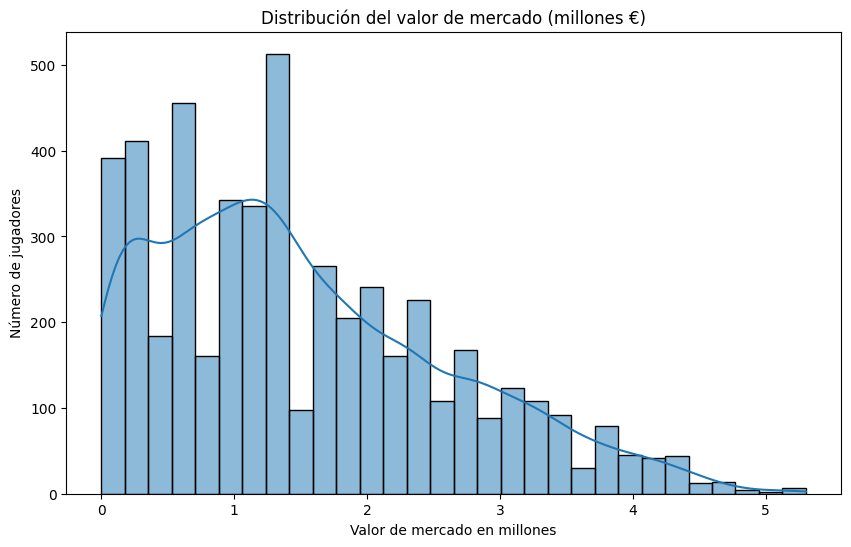

In [44]:
# 1. Distribución general de mv_millions
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df["mv_millions"]), bins=30, kde=True)
plt.title("Distribución del valor de mercado (millones €)")
plt.xlabel("Valor de mercado en millones")
plt.ylabel("Número de jugadores")
plt.show()

In [45]:
# 2. Correlación con otras variables numéricas
corr = df.select_dtypes(include="number").corr()["mv_millions"].drop("mv_millions").sort_values(ascending=False)
print("🔗 Variables más correlacionadas con mv_millions:")
print(corr) # Top 10 positivas

🔗 Variables más correlacionadas con mv_millions:
Team Success_+/-             0.586332
Team Success_onG             0.581246
Team Success (xG)_xG+/-      0.558590
Team Success (xG)_onxG       0.548151
Carries_TotDist              0.525881
GCA_GCA                      0.523983
Carries_PrgDist              0.516211
GCA Types_PassLive           0.512721
Receiving_Rec                0.505389
Carries_1/3                  0.500987
Carries_Carries              0.500594
Expected_npxG+xAG            0.495495
Performance_G+A              0.490330
Short_Cmp                    0.483797
SCA Types_PassLive           0.482909
Touches_Att Pen              0.482721
Touches_Att 3rd              0.482544
Carries_PrgC                 0.482522
Progression_PrgC             0.482522
Expected_xA                  0.480984
Short_Att                    0.479483
Standard_SoT                 0.476824
Carries_CPA                  0.473551
SCA_SCA                      0.472722
xAG                          0.471301
E

### 🎯 Análisis conjunto: Valor medio y distribución de `mv_millions` por posición

Para entender mejor cómo varía el valor de mercado según el rol de los jugadores, combinamos dos perspectivas:

1. **Valor medio de mercado por posición**   
   - **Right Winger** lidera con un promedio cercano a 10.5 M€.  
   - Le siguen **Attacking Midfield** (~10.4 M€) y **Central Midfield** (~10.2 M€).  
   - Los defensas (Centre-Back, Left-Back, Right-Back) y porteros muestran valores medios mucho menores (de ~7.5 M€ a ~5.1 M€).

2. **Distribución de `mv_millions` por posición**  
   - Los **delanteros y extremos** presentan medianas más altas y cuartiles superiores más amplios, lo que indica no solo un valor medio alto sino también mayor variabilidad (muchos outliers de superestrellas).  
   - Los **centrocampistas defensivos** y **centre-backs** tienen medianas moderadas (~3–5 M€) y menos outliers extremos.  
   - **Goalkeepers** y **Right-Backs** presentan las medianas más bajas (< 2 M€) y una dispersión reducida, aunque con algunos outliers puntuales.

> **Interpretación clave:**  
> - La **posición** es un predictor muy fuerte de `mv_millions`: los roles ofensivos acumulan los valores medios más elevados y más outliers de gran valor.  
> - Para defensas y porteros, la distribución es mucho más concentrada en rangos bajos.  

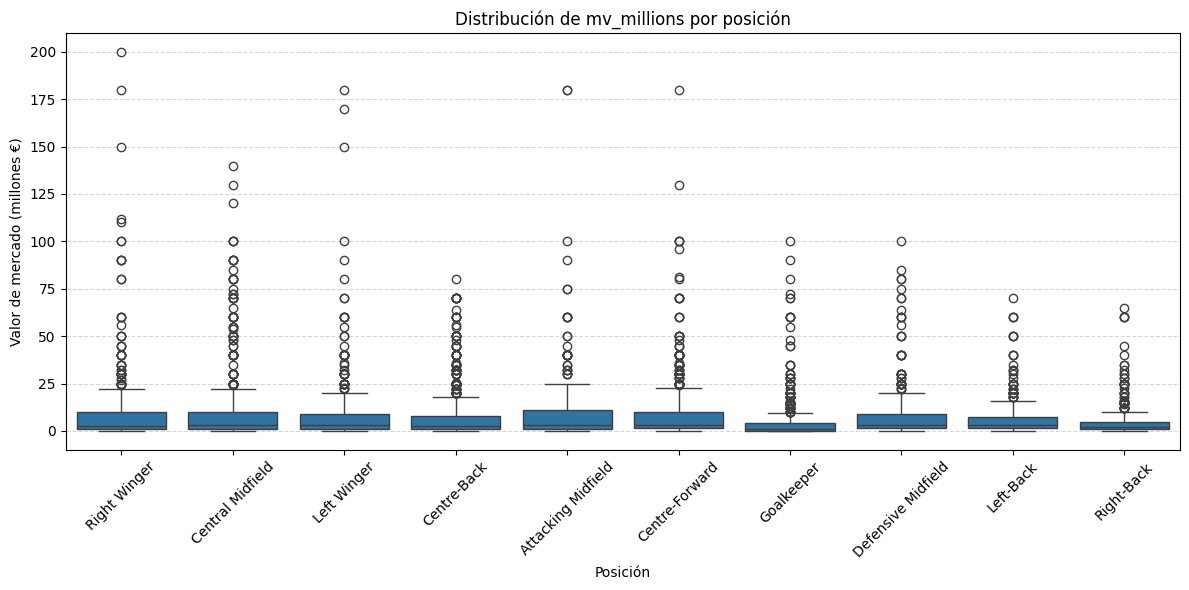

In [81]:
# 1) Boxplot del valor de mercado por posición
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='pos10', y='mv_millions')
plt.xticks(rotation=45)
plt.xlabel('Posición')
plt.ylabel('Valor de mercado (millones €)')
plt.title('Distribución de mv_millions por posición')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

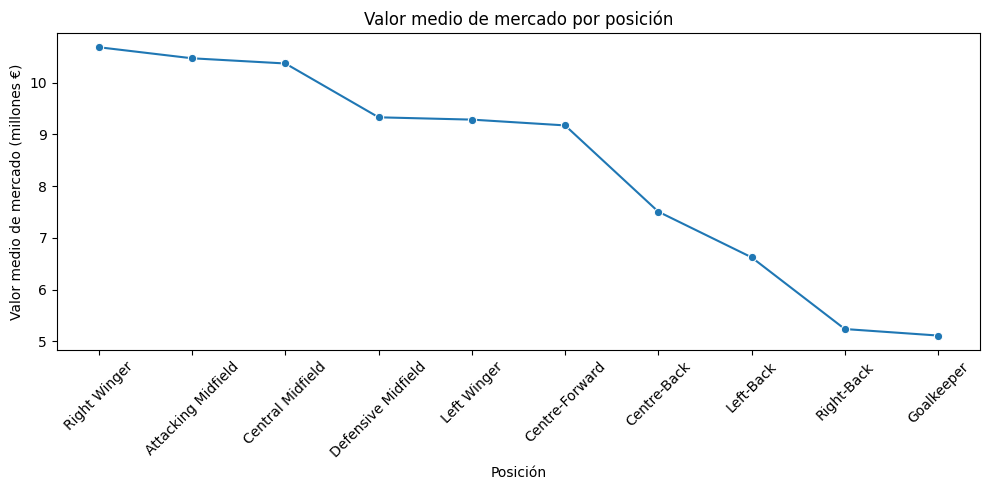

In [87]:
# 2) Valor medio de mercado por posición (barplot)
pos_means = df.groupby('pos10')['mv_millions'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=pos_means, x='pos10', y='mv_millions', marker="o")
plt.xticks(rotation=45)
plt.xlabel('Posición')
plt.ylabel('Valor medio de mercado (millones €)')
plt.title('Valor medio de mercado por posición')
plt.tight_layout()
plt.show()

### 📈 Evolución del valor de mercado: media y distribución por temporada

Para entender cómo ha cambiado el mercado de LaLiga a lo largo de las temporadas, combinamos dos visualizaciones:

1. **Valor medio de mercado por temporada**    
   - La **media** sube desde 8.4 M€ en 2017/18 hasta un **pico de 10.5 M€ en 2018/19**, para luego descender notablemente tras el impacto de la pandemia, alcanzando un **mínimo de 7.4 M€ en 2021/22**.  
   - A partir de 2022/23 se observa una **recuperación parcial**, con la media situada en torno a 8–8.2 M€ en las últimas dos campañas.

2. **Distribución del valor de mercado por temporada**    
   - Los **boxplots** muestran no solo las medianas, sino también la dispersión y los outliers extremos (superestrellas).  
   - Coincidiendo con el pico de media en 2018/19, la mediana y la cola superior también están más elevadas, indicando un mercado inflado.  
   - La caída hasta 2021/22 se refleja en una mediana más baja y menor dispersión.  
   - En 2023/24 y 2024/25 vuelven a aparecer outliers muy altos (fichajes de élite), aunque la mediana no recupera completamente los máximos pre-pandemia.

> **Conclusión conjunta:**  
> - La combinación de la línea de tendencia y el boxplot confirma un **boom** del mercado en 2018/19, un **colapso temporal** hasta 2021/22, y luego una **lentísima recuperación** en 2023/24–2024/25.  
> - Estos patrones temporales son fundamentales para que el modelo aprenda las fluctuaciones de mercado propias de cada temporada.


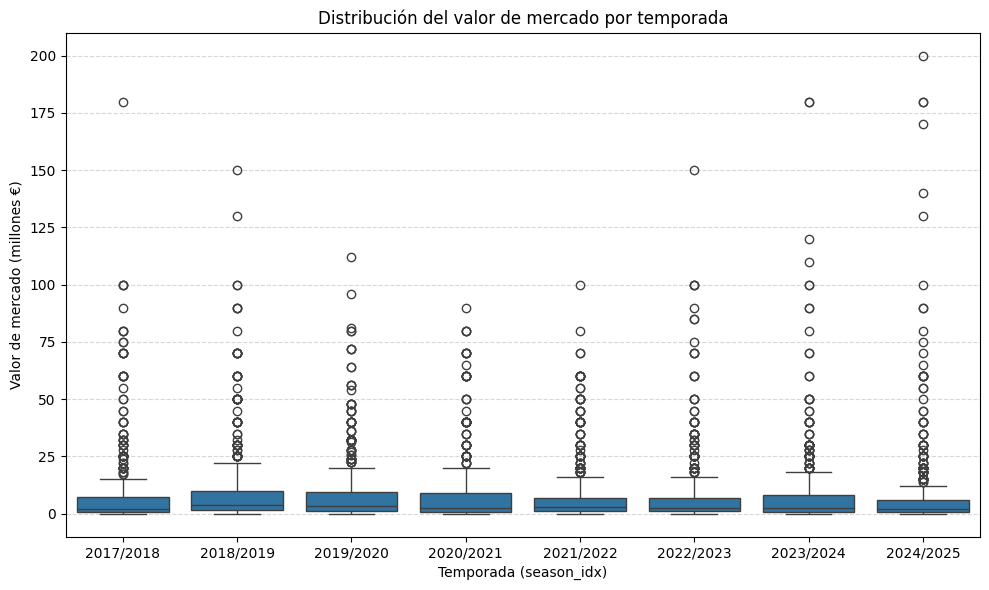

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Boxplot por temporada (season_idx)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='mv_millions')
plt.title('Distribución del valor de mercado por temporada')
plt.xlabel('Temporada (season_idx)')
plt.ylabel('Valor de mercado (millones €)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


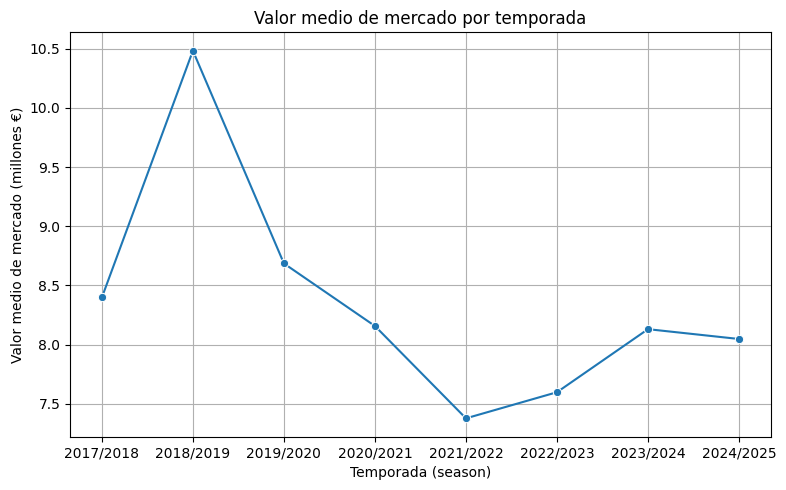

In [85]:
# 2) Tendencia de la media de mv_millions a lo largo de las temporadas
season_mean = df.groupby('Season')['mv_millions'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=season_mean, x='Season', y='mv_millions', marker='o')
plt.title('Valor medio de mercado por temporada')
plt.xlabel('Temporada (season)')
plt.ylabel('Valor medio de mercado (millones €)')
plt.grid(True)
plt.tight_layout()
plt.show()

A continuación se muestran cuatro gráficos de barras que desglosan, para cada temporada, cuántos jugadores caen en cada uno de estos rangos de valor:

1. **Valor = 0 M€**  
2. **0 < valor ≤ 1 M€**  
3. **1 M€ < valor ≤ 100 M€**  
4. **Valor > 100 M€**

**Principales conclusiones:**

- **Jugadores sin valor (0 M€):**  
  - Aumentan progresivamente hasta el pico en 2021/22 (≈33 jugadores) y luego se estabilizan en torno a 25–28.  
  - Refleja un crecimiento del grupo de futbolistas con poca o ninguna presencia de mercado tras la pandemia.

- **Jugadores de bajo valor (0–1 M€):**  
  - Se mantienen relativamente estables entre 100–190 jugadores, con un mínimo en 2018/19 (≈104) y un máximo en 2024/25 (≈188).  
  - Indica el tamaño de la “base” de jugadores jóvenes o de escasa proyección que siguen en la plantilla.

- **Jugadores de valor medio (1–99 M€):**  
  - Constituyen la **gran mayoría**, oscilando entre 350 y 420 jugadores por temporada.  
  - Su número crece hasta 2021/22 (≈420), se mantiene alto y luego desciende ligeramente en 2024/25.  
  - Este segmento es el corazón del mercado de LaLiga y es el más relevante para predecir `mv_millions`.

- **Superestrellas (> 100 M€):**  
  - Muy escaso (1–2 jugadores) hasta 2022/23, crece a 4 en 2023/24 y alcanza 6 en 2024/25.  
  - Corresponde a fichajes o renovaciones millonarias que elevan el top market.

---

> **Visión global:**  
> - El **grupo mayoritario** (1–99 M€) es relativamente estable y conforma la base de tu modelo.  
> - Los **rangos extremos** (0 M€ y > 100 M€) muestran cambios interesantes tras la pandemia y la inflación de fichajes, pero afectan a pocos jugadores.  

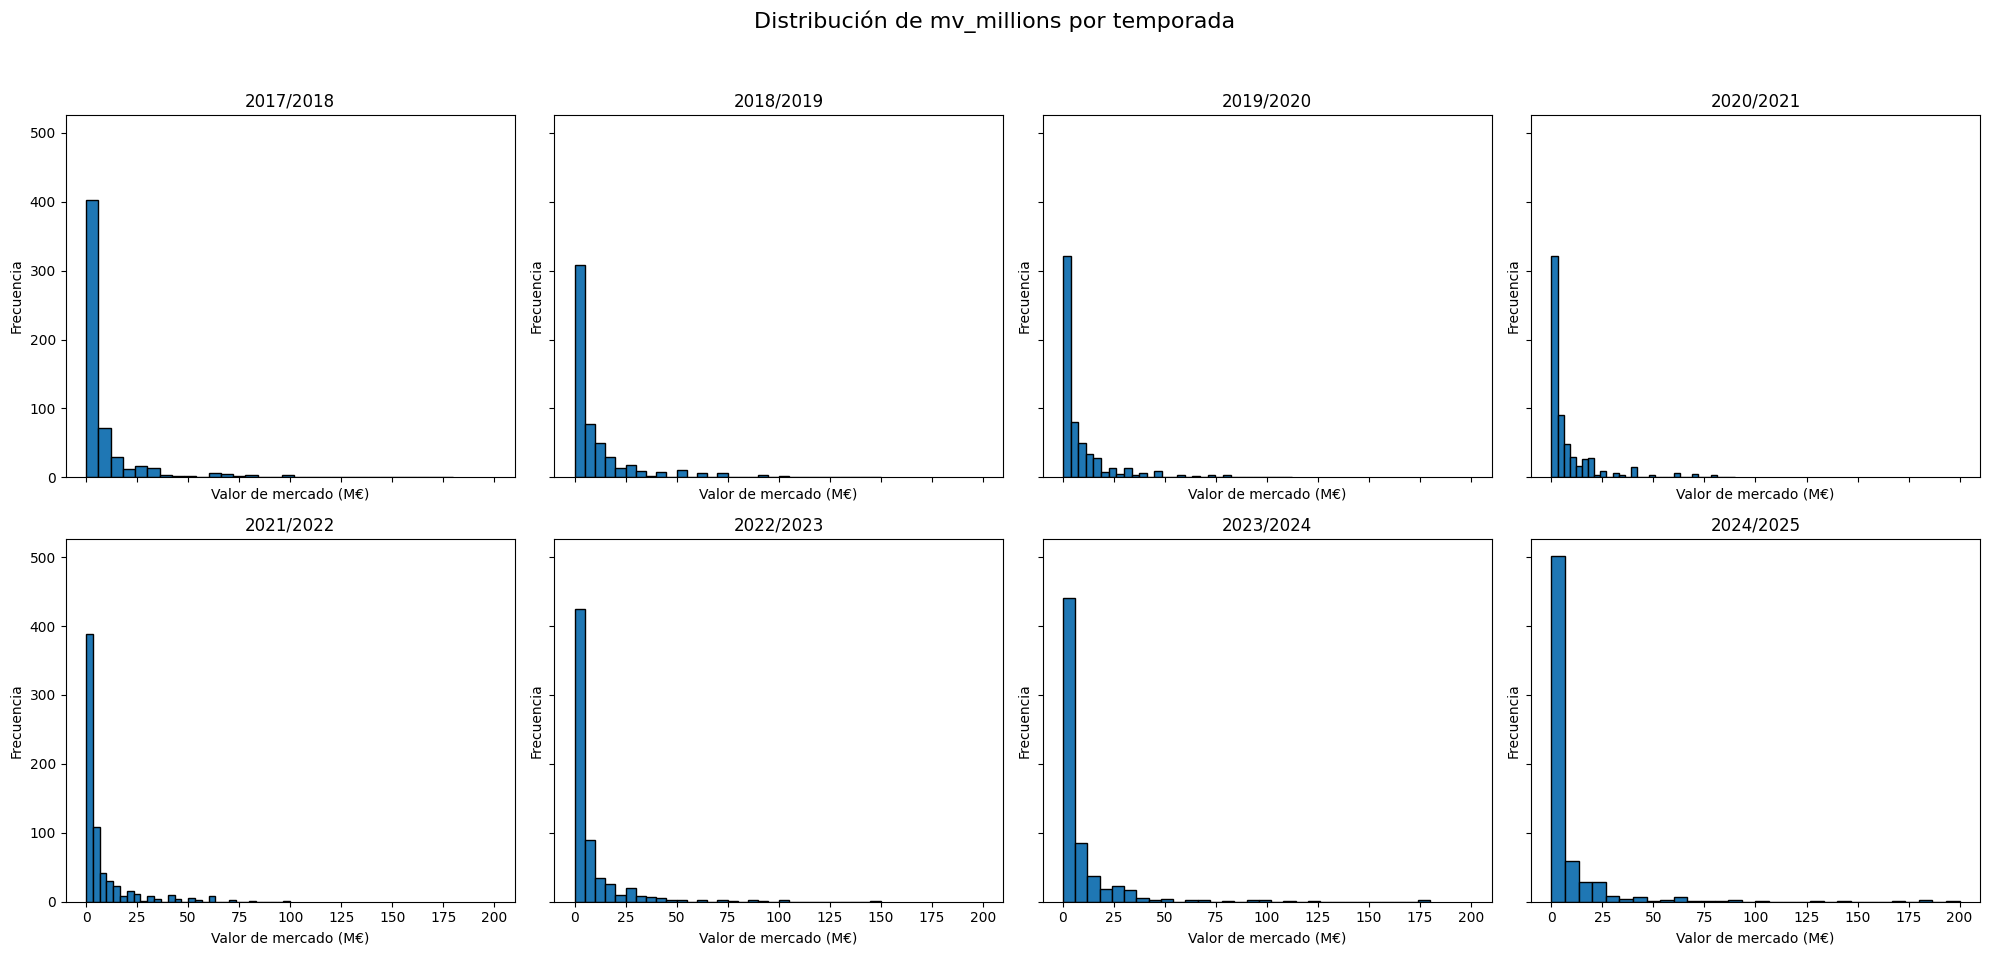

In [52]:
import matplotlib.pyplot as plt

# Obtenemos la lista de temporadas ordenadas
seasons = sorted(df['Season'].unique())

# Configuramos una figura con 2 filas y 4 columnas (8 temporadas)
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Bucle para dibujar un histograma en cada subplot
for ax, season in zip(axes, seasons):
    data = df.loc[df['Season'] == season, 'mv_millions']
    ax.hist(data, bins=30, edgecolor='black')
    ax.set_title(season)
    ax.set_xlabel('Valor de mercado (M€)')
    ax.set_ylabel('Frecuencia')

# Ajustes finales
plt.suptitle('Distribución de mv_millions por temporada', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [73]:
# Filtramos jugadores con valor de mercado igual a 0
zero_value = df[df["mv_millions"] == 0]

# Contamos por temporada
zero_counts = (
    zero_value
    .groupby("Season")["Player"]
    .nunique()  # asegúrate de contar jugadores únicos
    .reset_index(name="count_0M")
)

print(zero_counts)


      Season  count_0M
0  2017/2018        15
1  2018/2019         7
2  2019/2020        17
3  2020/2021        23
4  2021/2022        33
5  2022/2023        28
6  2023/2024        24
7  2024/2025        26


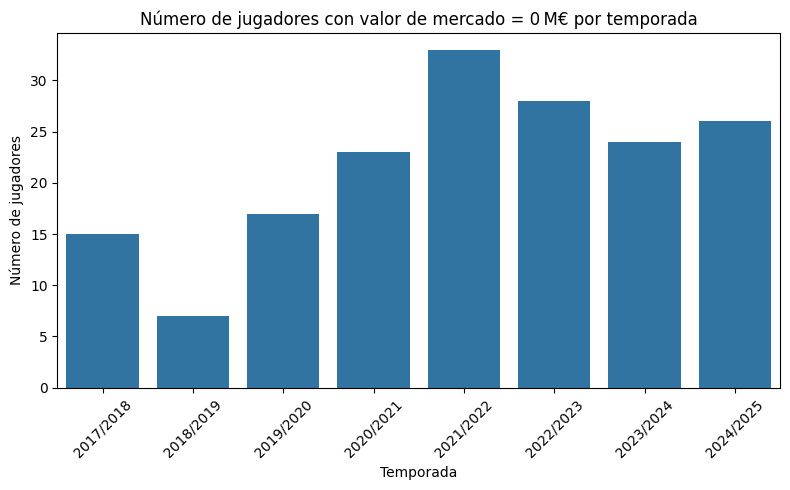

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=zero_counts, x="Season", y="count_0M")
plt.xticks(rotation=45)
plt.title("Número de jugadores con valor de mercado = 0 M€ por temporada")
plt.xlabel("Temporada")
plt.ylabel("Número de jugadores")
plt.tight_layout()
plt.show()

In [75]:
import pandas as pd

# Filtramos jugadores con valor entre 0 y 1 millón
low_value = df[(df["mv_millions"] > 0) & (df["mv_millions"] <= 1)]

# Contamos por temporada
counts_per_season = (
    low_value
    .groupby("Season")["Player"]
    .nunique()  # o .count() si hay duplicados de Player por temporada
    .reset_index(name="count_0_1M")
)

print(counts_per_season)


      Season  count_0_1M
0  2017/2018         152
1  2018/2019         103
2  2019/2020         124
3  2020/2021         164
4  2021/2022         157
5  2022/2023         150
6  2023/2024         157
7  2024/2025         190


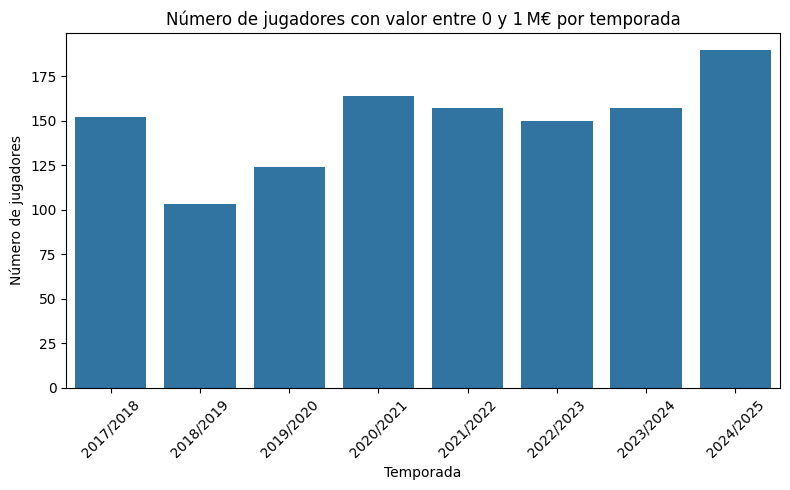

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=counts_per_season, x="Season", y="count_0_1M")
plt.xticks(rotation=45)
plt.title("Número de jugadores con valor entre 0 y 1 M€ por temporada")
plt.xlabel("Temporada")
plt.ylabel("Número de jugadores")
plt.tight_layout()
plt.show()


In [77]:
# Filtramos jugadores con valor entre 0 y 1 millón
mid_value = df[(df["mv_millions"] > 1) & (df["mv_millions"] <= 99)]

# Contamos por temporada
counts_mid_players = (
    mid_value
    .groupby("Season")["Player"]
    .nunique()  # o .count() si hay duplicados de Player por temporada
    .reset_index(name="count_1_99M")
)

print(counts_mid_players)

      Season  count_1_99M
0  2017/2018          347
1  2018/2019          388
2  2019/2020          395
3  2020/2021          390
4  2021/2022          420
5  2022/2023          417
6  2023/2024          412
7  2024/2025          387


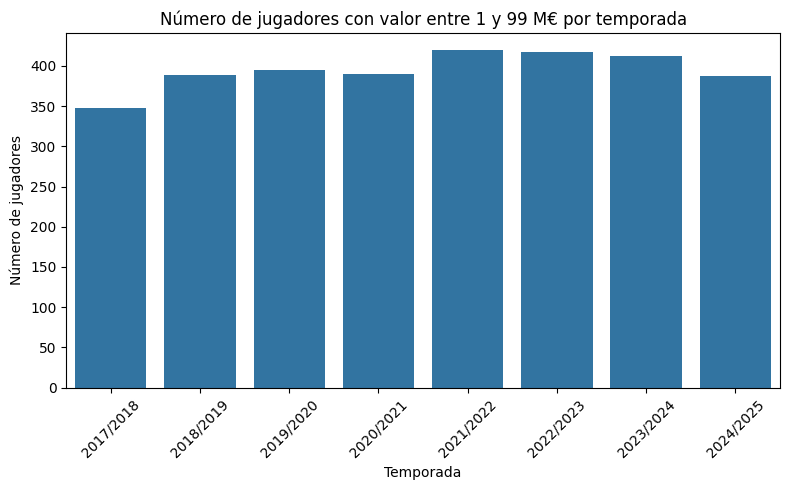

In [78]:
plt.figure(figsize=(8, 5))
sns.barplot(data=counts_mid_players, x="Season", y="count_1_99M")
plt.xticks(rotation=45)
plt.title("Número de jugadores con valor entre 1 y 99 M€ por temporada")
plt.xlabel("Temporada")
plt.ylabel("Número de jugadores")
plt.tight_layout()
plt.show()

In [79]:
# Filtrar los jugadores con valor > 100M€
high_value = df[df["mv_millions"] > 100]

# Contar cuántos jugadores únicos cumplen esto por temporada
counts_over_100 = (
    high_value
    .groupby("Season")["Player"]
    .nunique()
    .reset_index(name="count_over_100M")
)

print(counts_over_100)


      Season  count_over_100M
0  2017/2018                1
1  2018/2019                2
2  2019/2020                1
3  2022/2023                1
4  2023/2024                4
5  2024/2025                6


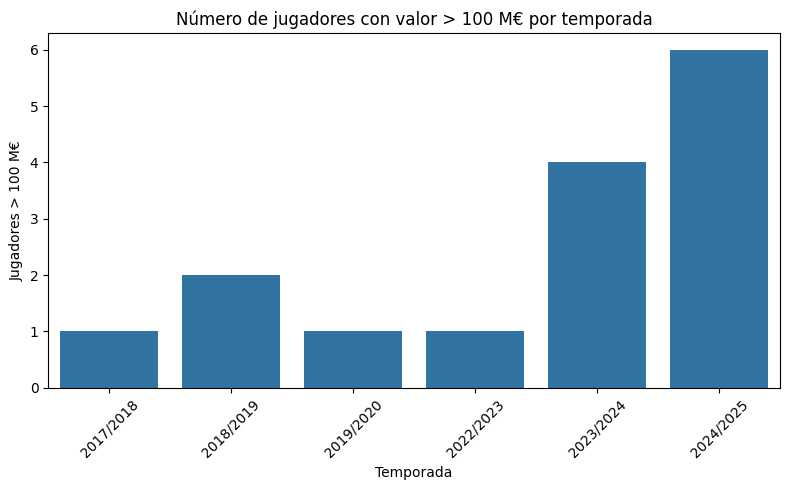

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=counts_over_100, x="Season", y="count_over_100M")
plt.xticks(rotation=45)
plt.title("Número de jugadores con valor > 100 M€ por temporada")
plt.xlabel("Temporada")
plt.ylabel("Jugadores > 100 M€")
plt.tight_layout()
plt.show()


### 📈 Valor de mercado vs Edad

El siguiente gráfico muestra la relación entre la edad de los jugadores y su valor de mercado (en millones de euros) al finalizar la temporada:

- Se aprecia una **forma de campana** típica: el valor de mercado tiende a **aumentar desde los 17 años hasta un pico entre los 23 y 26 años**, para después **disminuir progresivamente**.
- A edades tempranas (18–21) ya aparecen jugadores con valores muy altos, lo cual refleja la existencia de **jóvenes talentos con gran proyección**.
- A partir de los 30 años, el valor de mercado **desciende rápidamente**, lo que sugiere una devaluación natural debido al menor margen de desarrollo y menor duración contractual esperada.
- Existen algunos **outliers notables** en edades altas (30–35) que mantienen un valor de mercado elevado. Estos casos especiales pueden reflejar jugadores estrella que mantienen un rendimiento excepcional o gran valor mediático.

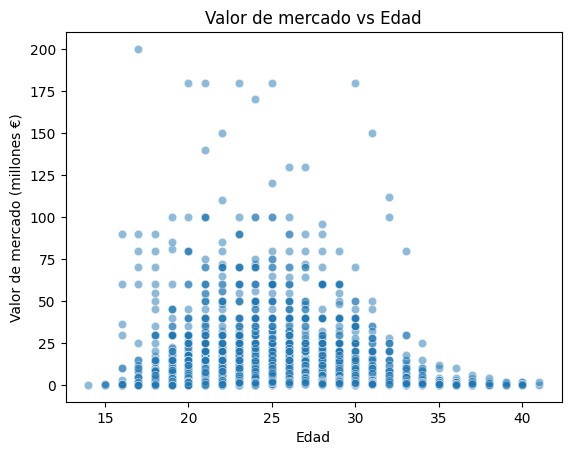

In [61]:
import seaborn as sns   
sns.scatterplot(data=df, x="Age", y="mv_millions", alpha=0.5)
plt.title("Valor de mercado vs Edad")
plt.xlabel("Edad")
plt.ylabel("Valor de mercado (millones €)")
plt.show()

#### 📈 Valor medio de mercado por intervalo de minutos jugados

Este gráfico muestra el **valor medio** de mercado (`mv_millions`) para bloques de minutos jugados en la temporada (`Playing Time_Min`). Cada punto representa el valor medio de los jugadores cuyo total de minutos cae dentro de ese intervalo.

- En los intervalos bajos (0–500 minutos), el valor medio es muy bajo (~2–5 M€), ya que engloba a suplentes o jugadores con muy poca participación.
- A partir de unos **1 000 minutos**, el valor medio comienza a subir de forma notable (≈7–9 M€), indicando que los jugadores con mayor presencia en el campo adquieren mayor valoración.
- Entre **1 500 y 2 000 minutos** la media ronda los 10–13 M€, y supera los **15 M€** para aquellos que juegan más de 2 000 minutos.
- Los jugadores con **entre 2 800–3 400 minutos** (titular indiscutible) alcanzan un valor medio superior a **20 M€**.

Este análisis confirma que la **cantidad de minutos jugados** es una variable fuertemente predictiva del valor de mercado, con una tendencia claramente creciente y relativamente suave, ideal para incorporar en el modelo de regresión.


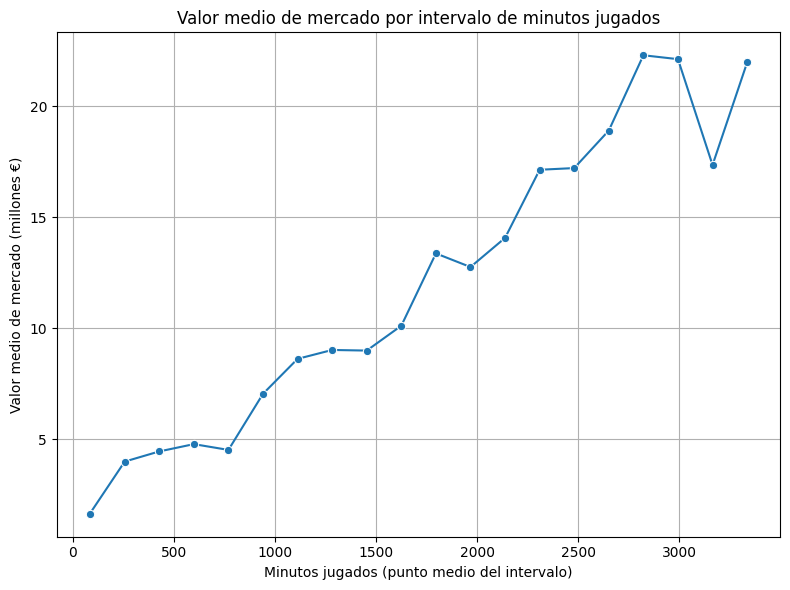

In [ ]:
# Hacemos una copia y creamos los bins
df_bins = df.copy()
df_bins['minutos_bin'] = pd.cut(df_bins['Playing Time_Min'], bins=20)

# Agrupamos indicando observed=True para categorías
bin_stats = (
    df_bins
    .groupby('minutos_bin', observed=True)['mv_millions']
    .mean()
    .reset_index()
)

# Para dibujar, calculamos el punto medio de cada bin
bin_stats['mid'] = bin_stats['minutos_bin'].apply(lambda x: x.mid)

# Gráfico de línea de valor medio por bin
plt.figure(figsize=(8, 6))
sns.lineplot(data=bin_stats, x='mid', y='mv_millions', marker='o')
plt.title('Valor medio de mercado por intervalo de minutos jugados')
plt.xlabel('Minutos jugados (punto medio del intervalo)')
plt.ylabel('Valor medio de mercado (millones €)')
plt.grid(True)
plt.tight_layout()
plt.show()





#### 📈 Correlación Goles vs Valor de mercado por posición

El siguiente barplot muestra el coeficiente de Pearson entre los goles marcados (`Performance_Gls`) y el valor de mercado (`mv_millions`), desglosado por posición (`pos10`):

| Posición            | Corr. Pearson |
|---------------------|---------------|
| Right Winger        | 0.72          |
| Left Winger         | 0.59          |
| Attacking Midfield  | 0.59          |
| Centre-Forward      | 0.53          |
| Defensive Midfield  | 0.45          |
| Central Midfield    | 0.42          |
| Left-Back           | 0.31          |
| Right-Back          | 0.30          |
| Centre-Back         | 0.25          |
| Goalkeeper          | ~0.00         |

- **Mayor impacto**: Los extremos (`Right Winger`, `Left Winger`) y los mediapuntas (`Attacking Midfield`) presentan las correlaciones más altas (> 0.58), lo que confirma que los goles son un driver clave del valor de mercado en estos roles ofensivos.
- **Delanteros centrales** (`Centre-Forward`) también tienen una correlación moderada-alta (~ 0.53), alineado con su responsabilidad goleadora.
- **Centrocampistas defensivos** y **centrocampistas puros** muestran correlaciones intermedias (0.42–0.45), indicando que aunque los goles aportan valor, otras métricas (asistencias, pases clave) también son relevantes.
- **Defensas** (`Left-Back`, `Right-Back`, `Centre-Back`) presentan correlaciones más bajas (0.25–0.31), lo cual sugiere que para estos roles debe priorizarse el análisis de métricas defensivas (entradas, despejes, intercepciones).
- **Porteros** no muestran correlación significativa con los goles marcados (≈ 0), evidenciando que sus valores dependen de estadísticas específicas de su función (paradas, goles en contra, porterías a cero).

> **Conclusión:**  
> Al diseñar el modelo, conviene tratar la métrica de goles en función de la posición:  
> - Incluir un término de interacción o ponderación más fuerte para posiciones ofensivas.  
> - Complementar con métricas defensivas para roles defensivos y porteros.  


In [105]:
var = "Performance_Gls"

corrs = (
    df[[ "pos10", var, "mv_millions" ]]                # Seleccionamos solo las columnas necesarias
      .groupby("pos10")                                # Agrupamos por posición
      .apply(lambda g: g[[var, "mv_millions"]]
                       .corr()
                       .loc[var, "mv_millions"])
      .reset_index(name="corr_with_mv")
      .sort_values("corr_with_mv", ascending=False)
)

print(corrs.sort_values("corr_with_mv", ascending=False))



                pos10  corr_with_mv
8        Right Winger      0.718815
6         Left Winger      0.591005
0  Attacking Midfield      0.587584
3      Centre-Forward      0.530584
4  Defensive Midfield      0.443955
1    Central Midfield      0.415662
7           Left-Back      0.309262
9          Right-Back      0.300959
2         Centre-Back      0.254941
5          Goalkeeper           NaN


C:\Users\jorgi\AppData\Local\Temp\ipykernel_24976\3731004564.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[[var, "mv_millions"]]


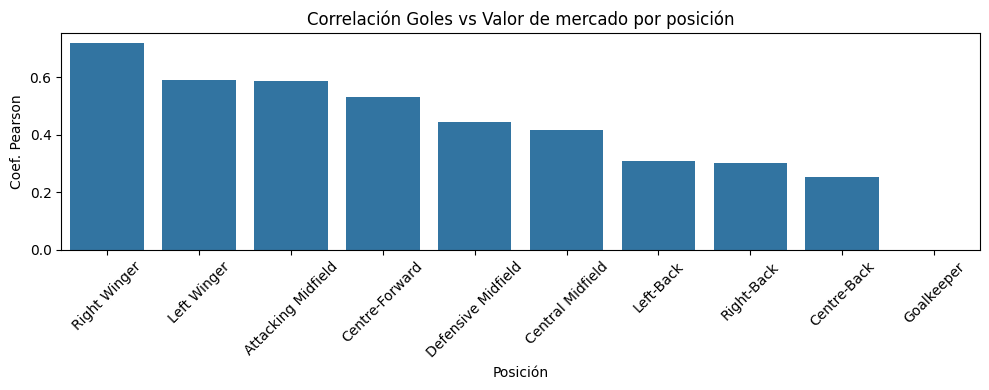

In [106]:
# Barplot de correlaciones
plt.figure(figsize=(10,4))
sns.barplot(data=corrs, x="pos10", y="corr_with_mv")
plt.xticks(rotation=45)
plt.title("Correlación Goles vs Valor de mercado por posición")
plt.ylabel("Coef. Pearson")
plt.xlabel("Posición")
plt.tight_layout()
plt.show()



C:\Users\jorgi\AppData\Local\Temp\ipykernel_24976\2001451687.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[[var, "mv_millions"]].corr().loc[var, "mv_millions"])


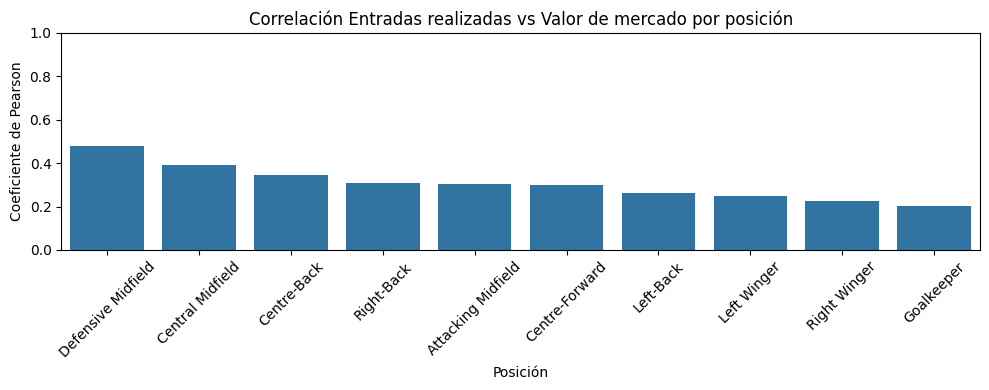

C:\Users\jorgi\AppData\Local\Temp\ipykernel_24976\2001451687.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[[var, "mv_millions"]].corr().loc[var, "mv_millions"])


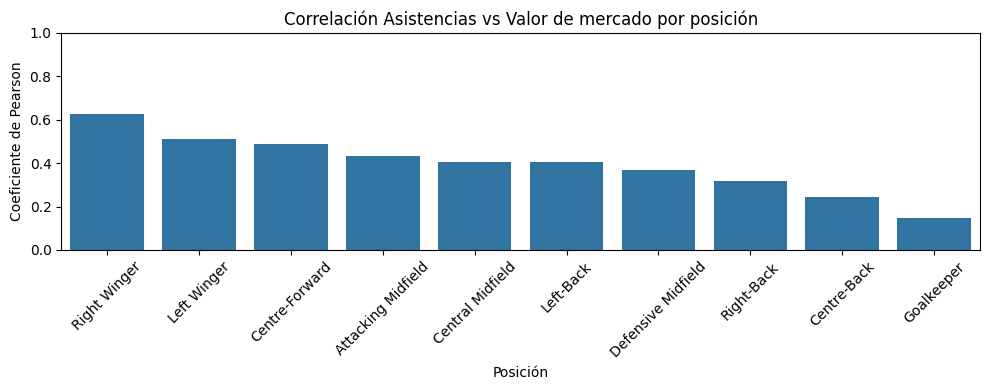

C:\Users\jorgi\AppData\Local\Temp\ipykernel_24976\2001451687.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[[var, "mv_millions"]].corr().loc[var, "mv_millions"])


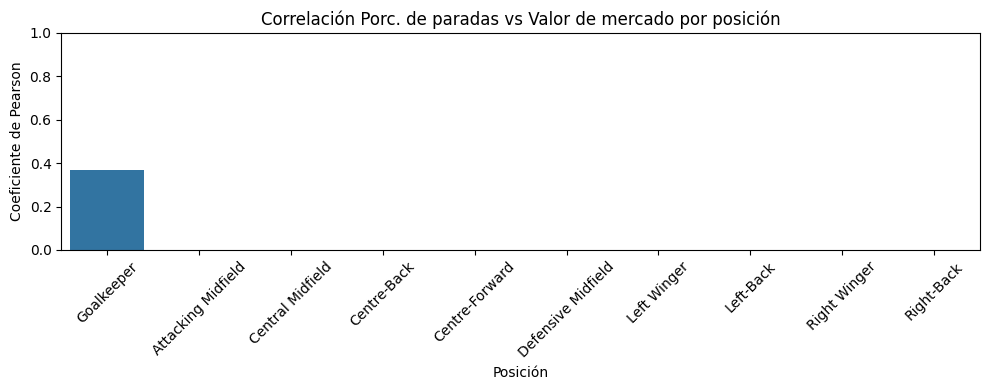

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables seleccionadas
metrics = {
    "Tackles_Tkl": "Entradas realizadas",
    "Performance_Ast": "Asistencias",
    "Performance_Save%": "Porc. de paradas"
}

# Calcular correlaciones y graficar para cada métrica
for var, label in metrics.items():
    # Calculamos la correlación de var vs mv_millions por posición
    corrs = (
        df[[ "pos10", var, "mv_millions" ]]
          .groupby("pos10", observed=True)
          .apply(lambda g: g[[var, "mv_millions"]].corr().loc[var, "mv_millions"])
          .reset_index(name="corr_with_mv")
          .sort_values("corr_with_mv", ascending=False)
    )
    
    # Barplot
    plt.figure(figsize=(10,4))
    sns.barplot(data=corrs, x="pos10", y="corr_with_mv")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.title(f"Correlación {label} vs Valor de mercado por posición")
    plt.xlabel("Posición")
    plt.ylabel("Coeficiente de Pearson")
    plt.tight_layout()
    plt.show()
